In [3]:
import numpy as np
import sys
sys.path.append('../')
from landscape_models import make_NK, all_genotypes
import matplotlib.pyplot as plt

In [9]:
import networkx as nx

In [90]:
def num_maxima(graph, func_key):
    """Given a networkx graph with scalar node attributes given by func_key, returns the number of local maxima
       with respect to 1-edge distance.
       
       NOTE: THIS ALGORITHM WONT WORK"""
    
    maxima = []
    neigh = []
    
    for node in graph.nodes():
        node_fitness = graph.nodes[node][func_key]
        neigh_fits   = np.array([graph.nodes[neighbour_node][func_key] for neighbour_node in graph.neighbors(node)])
        num_neighs   = len(neigh_fits)
        is_maximum   = np.all(np.greater(node_fitness, neigh_fits))
        maxima.append(is_maximum)
        neigh.append(num_neighs)

    maxima = np.array(maxima)
    
    n_max  = np.sum(maxima)

    return n_max, maxima,neigh




## Cartesian product of complete graph with  path graph 

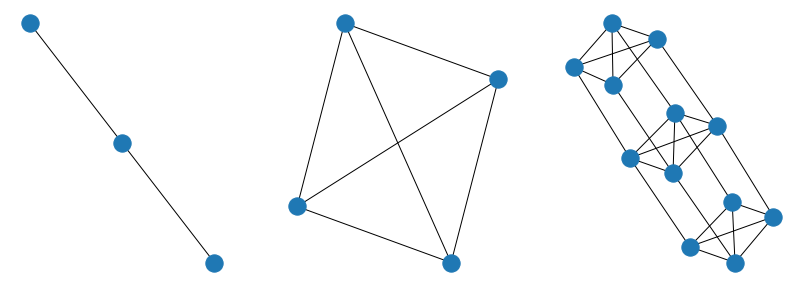

In [134]:
g1_size = 3
g2_size = 4


g1 = nx.path_graph(g1_size)
g2 = nx.complete_graph(g2_size)
G = nx.cartesian_product(g1, g2)
f  = {x:y for x, y in zip(G.nodes(), list( np.random.rand(g1_size*g2_size)))}
nx.set_node_attributes(G, f, 'f')    
fig, ax = plt.subplots(ncols=3, figsize=(14,5))
nx.draw(g1, ax=ax[0])
nx.draw(g2, ax=ax[1])
nx.draw(G, ax=ax[2])

In [148]:
Gp = nx.complement(G)

In [149]:
nx.clique.graph_clique_number(Gp)

3

In [151]:
nx.clique.graph_number_of_cliques(Gp)

36

This approach (i.e. assigning random numbers to find maxima) won't work because there is no guarantee that nodes mutually separated by 2 distance units will have the maximal fitness among their own neighbour set (a neighbur set that they share with the other mutually separated nodes. 

**Definition**. Mutually separated node set. Let $G$ be a graph. Define the complement of $G$, $G'$ to be the set of vertices fulfilling $\text{dist}(v_i, v_j) \geq 2$ for all $v_i, v_j \in G$. 


A *mutually disjoint node set* is
$$ v_i, v_j \in \mathcal{M} \iff \text{dist}(v_i, v_j) \geq 2 \

In [152]:
print('product degree: {}'.format(list(G.degree())[0][1]))
print('Max no. local maxima: {}'.format(num_maxima(G, 'f')[0]))

product degree: 4
Max no. local maxima: 2


Text(0.5, 1.0, 'complement cart(G1, G2)')

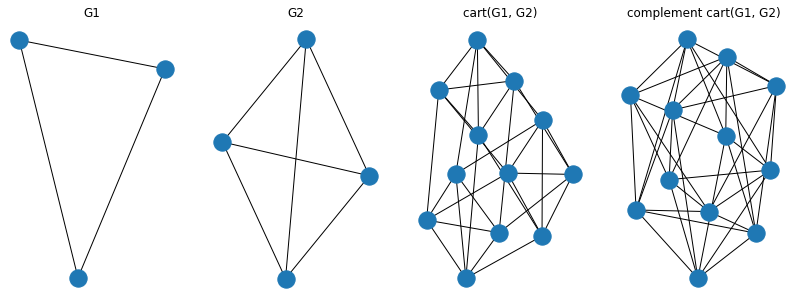

In [159]:
g1_size = 3
g2_size = 4
g1 = nx.complete_graph(g1_size)
g2 = nx.complete_graph(g2_size)
G = nx.cartesian_product(g1, g2)
fig, ax = plt.subplots(ncols=4, figsize=(14,5))
nx.draw(g1, ax=ax[0],)
nx.draw(g2, ax=ax[1])
nx.draw(G, ax=ax[2])
Gp = nx.complement(G)
nx.clique.graph_clique_number(Gp)
nx.draw(Gp,ax=ax[3])
ax[0].set_title('G1')
ax[1].set_title('G2')
ax[2].set_title('cart(G1, G2)')
ax[3].set_title('complement cart(G1, G2)')


Text(0.5, 1.0, 'complement cart(G1, G2)')

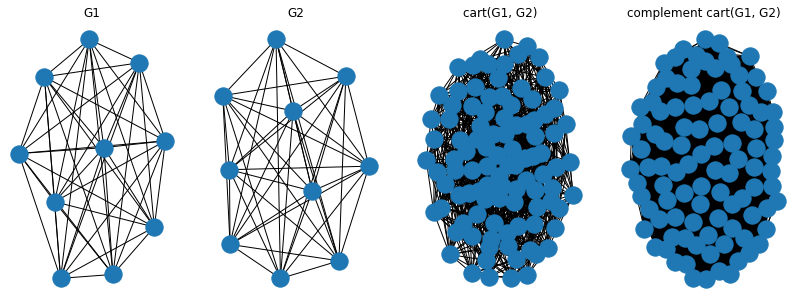

In [160]:
g1_size = 10
g2_size = 10
g1 = nx.complete_graph(g1_size)
g2 = nx.complete_graph(g2_size)
G = nx.cartesian_product(g1, g2)
fig, ax = plt.subplots(ncols=4, figsize=(14,5))
nx.draw(g1, ax=ax[0],)
nx.draw(g2, ax=ax[1])
nx.draw(G, ax=ax[2])
Gp = nx.complement(G)
nx.clique.graph_clique_number(Gp)
nx.draw(Gp,ax=ax[3])
ax[0].set_title('G1')
ax[1].set_title('G2')
ax[2].set_title('cart(G1, G2)')
ax[3].set_title('complement cart(G1, G2)')

In [161]:
nx.clique.graph_clique_number(Gp)


10

Text(0.5, 1.0, 'complement cart(G1, G2)')

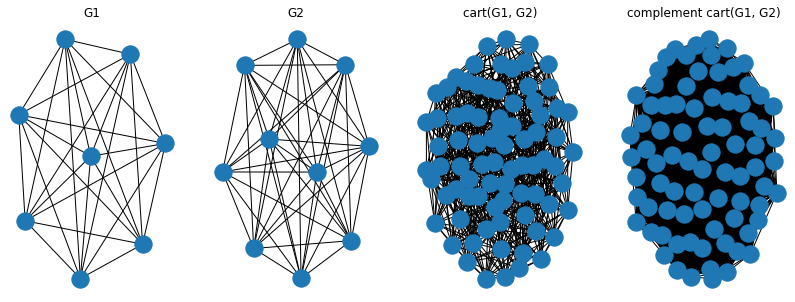

In [162]:
g1_size = 8
g2_size = 10
g1 = nx.complete_graph(g1_size)
g2 = nx.complete_graph(g2_size)
G = nx.cartesian_product(g1, g2)
fig, ax = plt.subplots(ncols=4, figsize=(14,5))
nx.draw(g1, ax=ax[0],)
nx.draw(g2, ax=ax[1])
nx.draw(G, ax=ax[2])
Gp = nx.complement(G)
nx.draw(Gp,ax=ax[3])
ax[0].set_title('G1')
ax[1].set_title('G2')
ax[2].set_title('cart(G1, G2)')
ax[3].set_title('complement cart(G1, G2)')

In [163]:
nx.clique.graph_clique_number(Gp)


8

Text(0.5, 1.0, 'complement cart(G1, G2)')

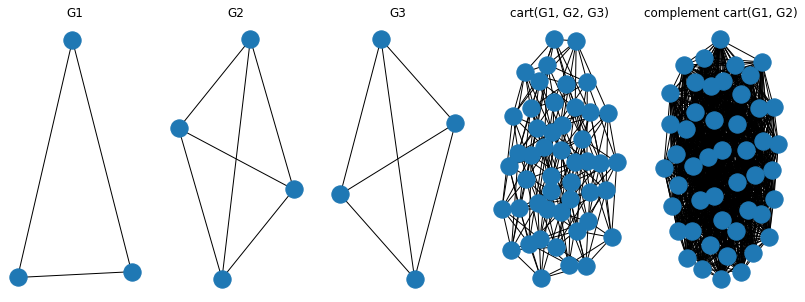

In [164]:
g1_size = 3
g2_size = 4
g3_size = 4
g1 = nx.complete_graph(g1_size)
g2 = nx.complete_graph(g2_size)
g3 = nx.complete_graph(g3_size)
G = nx.cartesian_product(nx.cartesian_product(g1, g2), g3)
fig, ax = plt.subplots(ncols=5, figsize=(14,5))
nx.draw(g1, ax=ax[0],)
nx.draw(g2, ax=ax[1])
nx.draw(g3, ax=ax[2])

nx.draw(G, ax=ax[3])
Gp = nx.complement(G)
nx.draw(Gp,ax=ax[4])
ax[0].set_title('G1')
ax[1].set_title('G2')
ax[2].set_title('G3')

ax[3].set_title('cart(G1, G2, G3)')
ax[4].set_title('complement cart(G1, G2)')

In [165]:
nx.clique.graph_clique_number(Gp)


12

Text(0.5, 1.0, 'complement cart(G1, G2)')

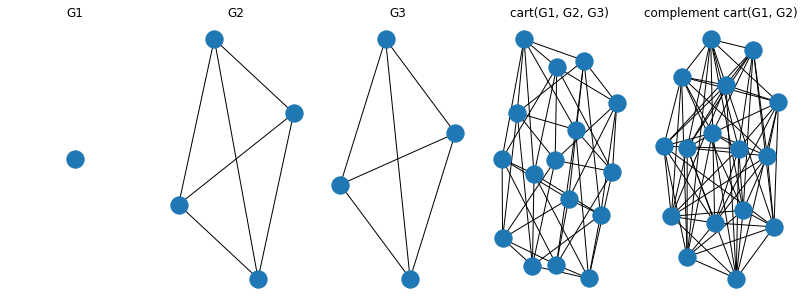

In [166]:
g1_size = 1
g2_size = 4
g3_size = 4
g1 = nx.complete_graph(g1_size)
g2 = nx.complete_graph(g2_size)
g3 = nx.complete_graph(g3_size)
G = nx.cartesian_product(nx.cartesian_product(g1, g2), g3)
fig, ax = plt.subplots(ncols=5, figsize=(14,5))
nx.draw(g1, ax=ax[0],)
nx.draw(g2, ax=ax[1])
nx.draw(g3, ax=ax[2])

nx.draw(G, ax=ax[3])
Gp = nx.complement(G)
nx.draw(Gp,ax=ax[4])
ax[0].set_title('G1')
ax[1].set_title('G2')
ax[2].set_title('G3')

ax[3].set_title('cart(G1, G2, G3)')
ax[4].set_title('complement cart(G1, G2)')

In [167]:
nx.clique.graph_clique_number(Gp)


4

In [94]:
nx.diameter(G)

2

In [95]:
nx.radius(G)

2

In [96]:
nx.set_node_attributes(G, f, 'f')    

In [97]:
num_maxima(G, 'f')

(2,
 array([ True, False, False, False, False, False, False, False, False,
         True, False, False]),
 [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [98]:
np.all(np.greater(node_fitness, neigh_fits))

True

In [63]:
node_fitness

0.7257931676506825

In [62]:
neigh_fits

array([0.71360249, 0.32630396, 0.34860865, 0.14976384, 0.52274849])

In [52]:
G.nodes[(0,1)]

{'f': 0.6152448624034151}

In [60]:
for node in G.neighbors((0,1)):
    print (node)

(1, 1)
(2, 1)
(0, 0)
(0, 2)
(0, 3)
